## Problem set 2:

Using the tools you've learned so far for data exploration and model fitting, can you find a better linear regression model for predicting an automobile's fuel efficiency ($mpg$) from its other attributes?  For this exercise, you can evaluate the fit of your models using $R^2$.

### 1. load the data and packages

In [1]:
import pandas as pd
import numpy as np
import plotnine as pn

from sklearn.linear_model import LinearRegression


df = pd.read_csv('/home/kenziemabry/blue_zoo6927/share/Jupyter_Content/data/auto_mpg.csv')
df

,mpg,cyl,disp,hp,weight,accel,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


### 2. From plotting data below it looks like both weight and year are important in explaining the variation in mpg

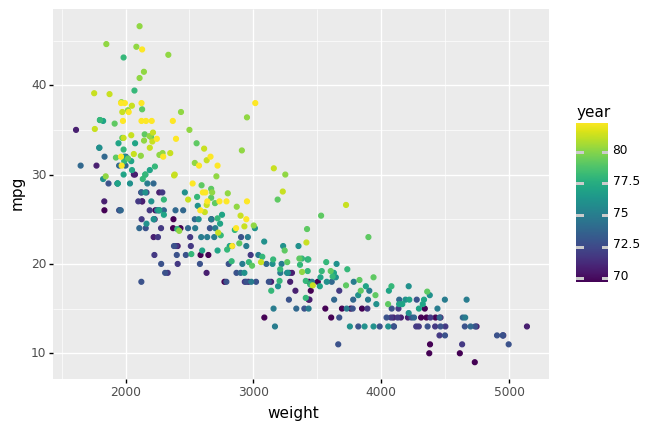

<ggplot: (2958612087796)>

In [2]:
pn.ggplot(df, pn.aes(x="weight", y = "mpg", color = "year")) + pn.geom_point()

### 3. Since the distrubution has a curve to it, square weight. Creating a new predictor variable for the model.

In [3]:
df['weight2'] = df.weight**2
df

,mpg,cyl,disp,hp,weight,accel,year,origin,name,weight2
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,12278016
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,13638249
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,11806096
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,11785489
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,11895601
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,7784100
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,4536900
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,5267025
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,6890625


### 4. Set up y and x variables. Select the predictor variables for the model.

In [4]:
y = df.mpg
x = df[['weight', 'year', 'weight2']]
x

,weight,year,weight2
0,3504,70,12278016
1,3693,70,13638249
2,3436,70,11806096
3,3433,70,11785489
4,3449,70,11895601
...,...,...,...
387,2790,82,7784100
388,2130,82,4536900
389,2295,82,5267025
390,2625,82,6890625


### 5. Create and fit the linear model. Print intercept and coefficients.

In [5]:
model = LinearRegression().fit(x,y)
print(model.intercept_, model.coef_)

2.120833534666943 [-2.15479673e-02  8.28927644e-01  2.34771594e-06]


### 6. Print model evaluation information, R2.

In [7]:
model.score(x, y)

0.8502656134566352